# 90 Day Data Grab
## Group 1
## 14 July 2021

### Introduction

Code imports daily stock price and interest over time over last 90 days (4/1/2021 to 6/30/2021) for:
 GameStop (GME)
 Apple
 Coke
 John Deere
 AMC


### Import

In [62]:
# import pip

import yfinance as yf
import pandas as pd

from pytrends.request import TrendReq

import numpy as np

%matplotlib inline

import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

# Global Varaible

dataDir = r"./Data Files/"

In [63]:
# Connect to Google API

pytrends = TrendReq(hl='en-US', tz=360)

In [64]:
# Set Keyword

kw_list = ['GME']

# Build Payload

pytrends.build_payload(kw_list, timeframe='2021-04-01 2021-06-30', geo='')


In [65]:
# Get trends Data frame

GME_trends = pytrends.interest_over_time()
GME_trends.rename(columns = {"GME": "Google Searches"},
          inplace = True)

GME_trends


,Google Searches,isPartial
date,,
2021-04-01,72,False
2021-04-02,29,False
2021-04-03,13,False
2021-04-04,11,False
2021-04-05,67,False
...,...,...
2021-06-26,10,False
2021-06-27,8,False
2021-06-28,33,False


In [66]:
# Get stock Data Frame

GME_stock = yf.download("GME", start="2021-04-01", end="2021-06-30", interval="1d")
GME_stock



[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,193.360001,196.970001,183.600006,191.449997,191.449997,9334300
2021-04-05,171.000000,195.000000,164.809998,186.949997,186.949997,14070500
2021-04-06,185.210007,192.000000,183.559998,184.500000,184.500000,6218300
2021-04-07,183.220001,184.500000,176.110001,177.970001,177.970001,4768300
2021-04-08,185.880005,185.880005,164.300003,170.259995,170.259995,10047400
...,...,...,...,...,...,...
2021-06-23,221.449997,222.570007,214.119995,219.339996,219.339996,3555100
2021-06-24,221.160004,227.449997,211.600006,212.309998,212.309998,3863300
2021-06-25,214.000000,214.199997,198.500000,209.509995,209.509995,12692700


In [67]:
# Combine Data
GME_DF = pd.concat([GME_stock, GME_trends], axis = 1, join = 'inner')
GME_DF

# Add difference

GME_DF["Price Difference"] = GME_DF["Open"]-GME_DF["Close"]

In [68]:
# Export to data folder
GME_DF.to_csv(f"{dataDir}GME_DF_07.14.2021.csv")

In [69]:
# Get Data locally
GME_DF = pd.read_csv(f"{dataDir}GME_DF_07.14.2021.csv")
GME_DF.set_index('Unnamed: 0', inplace=True)
GME_DF.index = pd.to_datetime(GME_DF.index)
GME_DF

,Open,High,Low,Close,Adj Close,Volume,Google Searches,isPartial,Price Difference
Unnamed: 0,,,,,,,,,
2021-04-01,193.360001,196.970001,183.600006,191.449997,191.449997,9334300,72,False,1.910004
2021-04-05,171.000000,195.000000,164.809998,186.949997,186.949997,14070500,67,False,-15.949997
2021-04-06,185.210007,192.000000,183.559998,184.500000,184.500000,6218300,59,False,0.710007
2021-04-07,183.220001,184.500000,176.110001,177.970001,177.970001,4768300,52,False,5.250000
2021-04-08,185.880005,185.880005,164.300003,170.259995,170.259995,10047400,53,False,15.620010
...,...,...,...,...,...,...,...,...,...
2021-06-23,221.449997,222.570007,214.119995,219.339996,219.339996,3555100,43,False,2.110001
2021-06-24,221.160004,227.449997,211.600006,212.309998,212.309998,3863300,36,False,8.850006
2021-06-25,214.000000,214.199997,198.500000,209.509995,209.509995,12692700,33,False,4.490005


Text(0.5, 1.0, 'Price Difference vs. Search Interest GME')

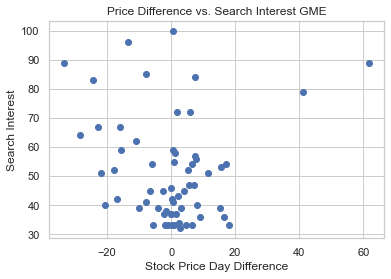

In [70]:
# Matplotlib
plt.scatter(GME_DF["Price Difference"].values, GME_DF["Google Searches"])
plt.xlabel('Stock Price Day Difference')
plt.ylabel('Search Interest')
plt.title('Price Difference vs. Search Interest GME')


Text(0.5, 1.0, 'Price Differnce and Interest Over Time GME')

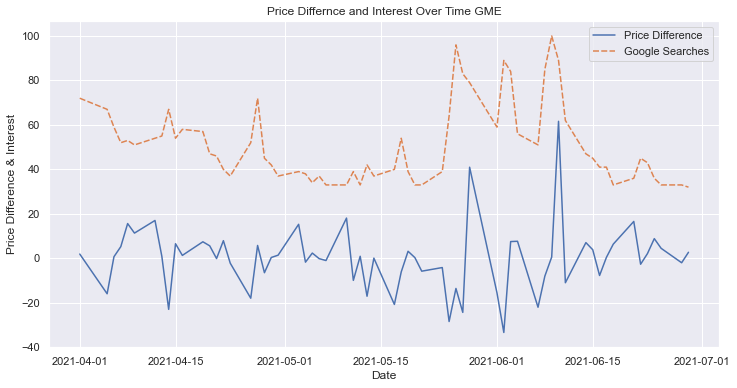

In [71]:
# Seaborne plot
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (12,6))
fig = sns.lineplot(data=GME_DF[["Price Difference","Google Searches"]], ax=ax)
plt.xlabel("Date")
plt.ylabel("Price Difference & Interest")
plt.title("Price Differnce and Interest Over Time GME")

In [72]:
# Plotly
xValue = GME_DF.index
openGME = GME_DF['Open']
highGME = GME_DF['High']
lowGME = GME_DF['Low']
closeGME = GME_DF['Close']


fig = px.graph_objs.Figure(data=[px.graph_objs.candlestick(x=xValue,
                open=openGME,
                high=highGME,
                low=lowGME,
                close=closeGME)])

fig.show()


TypeError: 'module' object is not callable

In [ ]:
fig = px.bar(GME_DF, x=GME_DF.index, y="Close")
fig.show()

### Apple
Ken Cupples

In [ ]:
#Reads in Apple stock data from a csv file
Apple = pd.read_csv(f"{dataDir}/AAPL.csv")


In [ ]:
#Slices the dataframe Apple to include only information from the second quarter defined from 4-1-2021 to 6-29-2021 making use of the indexes
AppleSecondQuarter = Apple.iloc[range(182, 244)]
AppleSecondQuarter

In [ ]:
sns.set_style("whitegrid")
fig, AppleScatter = plt.subplots(figsize=(25,10))
plt.xticks(rotation=90)
AppleScatter.set_title("Apple Stock Second Quarter Scatter Plot (K.Cupples)")
scatter = sns.scatterplot(ax=AppleScatter, data=AppleSecondQuarter,
            x="Date", y="Close", size="Volume")

In [ ]:
HistogramData = AppleSecondQuarter["Volume"]

In [ ]:
fig, HistVolume = plt.subplots(figsize=(20,10))
HistVolume.hist(HistogramData, )
HistVolume.set_title("Histogram of Volume Traded (K.Cupples)")
HistVolume.set_xlabel("Volume Traded per Day (Billions)")
HistVolume.set_ylabel("Count of Volume Traded per category")
plt.show()


In [ ]:
Averages = np.array([["April", Apple.iloc[182:203]["Close"].mean(),"May", Apple.iloc[203:223]["Close"].mean(), "June", Apple.iloc[223:245]["Close"].mean()]])
AverageMonthsTable = np.reshape(Averages,(3,2))
Column = [ "Month", "Average"]
AveragePrice = pd.DataFrame(AverageMonthsTable, columns=Column)
AveragePrice

In [ ]:
fig = px.pie(AveragePrice, values="Average", names="Month", title="Average stock value (K.Cupples)")
fig.show()

Shawn Sonnack

In [ ]:
#import matplotlib.pyplot as plt
#import yfinance as yf
#from pytrends.request import TrendReq
#import numpy as np
#import pandas as pd
#import seaborn as sns
#pip install plotly==5.1.0
#import plotly.express as px

# Set the trend

In [ ]:
pytrends = TrendReq(hl='en-US', tz=360)

# Setup Keyword Search, and pull the search results using pytrends for April 1 - June 30

In [ ]:
keywords = ["AMC"]
pytrends.build_payload(keywords, timeframe='2021-04-01 2021-06-30', geo='US')

# Show interest over time

In [ ]:
amcSearchResults = pytrends.interest_over_time()
amcSearchResults

In [ ]:
amcSearchResults = amcSearchResults.rename(columns={'AMC': 'Search Interest'})
amcSearchResults

# Use Yahoo Finance to pull Stock Data from April 1 - June 30

In [ ]:
amcStockInfo = yf.download("AMC", start="2021-04-01", end="2021-06-30", interval="1d")
amcStockInfo.shape

# Show the stock data

In [ ]:
amcStockInfo

# Add a Column Representing Amount Lost or Gained

In [ ]:
amcStockInfo["Amount Changed"] = amcStockInfo["Open"] - amcStockInfo["Close"]

# Merge the Two Tables

In [ ]:
amcMergedDataFrame = amcSearchResults.merge(amcStockInfo, how='inner', left_index=True, right_index=True)
amcMergedDataFrame

# Create a Filtered Table to Use for MatPlotLib

In [ ]:
amcFiltered = amcMergedDataFrame[['Search Interest', 'Close']]

In [ ]:
amcFiltered.head()
amcFiltered

# Create MatPlotLib focused on the price of stock and the level of search interest.  100 being extremely high, 0 being very little.

In [ ]:

plt.scatter(amcFiltered["Close"].values, amcFiltered["Search Interest"].values,)

plt.suptitle('AMC Stock Prices Year 2021 Q2', ha='center', fontsize='xx-large')
plt.xlabel('Price of Stock')

# Start creating SeaBorne DataFrame

In [ ]:
amcFilteredForSeaborne = amcMergedDataFrame[['Search Interest', 'Amount Changed']]
amcFilteredForSeaborne

# Create SeaBorne Chart showing Amount changed based on search interest.

In [ ]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="Amount Changed", y="Search Interest",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=amcFilteredForSeaborne, ax=ax)

# Plotly, prepare the table

In [ ]:
amcFilteredPlotLy = amcMergedDataFrame[['Close']]

# Plot the graph

In [ ]:
fig = px.line(amcFilteredPlotLy, title='Stock Price During The Period',
labels={
                     "value": "Price",
                     "index": "Date",
                     "variable": "Closing Price"
                 },)
fig.show()

### Coke
Arielle Swift

In [ ]:

#!pip install plotly
#import pandas as pd
#import matplotlib as mp
#import matplotlib.pyplot as plt
#import seaborn as sns
#import numpy as np
#import yfinance as yf
#import plotly.express as px

#%matplotlib inline

In [ ]:
KO2ndQtrData = pd.read_csv(f"{dataDir}KO.csv")
KO2ndQtrData

In [ ]:
KO2ndQtrData['Date']= pd.to_datetime(KO2ndQtrData['Date'],format='%Y-%m-%d')
KO2ndQtrData['Date'] = KO2ndQtrData['Date'].dt.strftime('%m-%d-%Y')
KO2ndQtrData


In [ ]:
KO2ndQtrData = KO2ndQtrData.loc[(KO2ndQtrData['Date'] >= '04-01-2021')
                     & (KO2ndQtrData['Date'] < '07-01-2021')]

# Matplotlib Graph

In [ ]:
#Mean for High, Low, Open, & Close of daily reported stock prices

muHigh=KO2ndQtrData["High"].mean()
muLow=KO2ndQtrData["Low"].mean()
muOpen=KO2ndQtrData["Open"].mean()
muClose=KO2ndQtrData["Close"].mean()


In [ ]:
#Standard deviation for High, Low, Open, & Close of daily reported stock prices
stdHigh=np.std(KO2ndQtrData["High"], ddof=1)
stdLow=np.std(KO2ndQtrData["Low"], ddof=1)
stdOpen=np.std(KO2ndQtrData["Open"], ddof=1)
stdClose=np.std(KO2ndQtrData["Close"], ddof=1)

In [ ]:
KO2ndQtrData=KO2ndQtrData.assign(Dailyalpha=lambda x: (x.Close+0.42-x.Open) / x.Open)


In [ ]:
alphaAvg=KO2ndQtrData["Dailyalpha"].mean()
alphaAvg

In [ ]:
x1=np.random.normal(muHigh,stdHigh,1000)
x2=np.random.normal(muLow,stdLow,1000)
x3=np.random.normal(muOpen,stdOpen,1000)
x4=np.random.normal(muClose,stdClose,1000)

kwargs=dict(histtype='step', alpha=0.7, bins = 40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)
plt.suptitle('Normal Distributions of Coke Stock Prices Year 2021 Q2', ha='center', fontsize='xx-large')
plt.xlabel('Price of Stock')
plt.ylabel('Frequency')

## Seaborn Graph

In [ ]:
Y21Q2=sns.relplot(data=KO2ndQtrData, x="Date", y="Close",hue="Volume",height=10)
Y21Q2.map(plt.axhline, y=52, color="k")
Y21Q2.set_axis_labels( "Date","Closing Stock Price")
Y21Q2.fig.suptitle("Daily Stock Closing Prices for YR 2021 - QTR 02")
x_dates = KO2ndQtrData['Date'].sort_values(ascending=True).unique()
Y21Q2.set_xticklabels(labels=x_dates, rotation=60, fontsize=7.5)
plt.figure(figsize = (25,25))


## Plotly Graph

In [ ]:
fig = px.pie(KO2ndQtrData["Volume"], values='Volume', title='Volume Rate per Date YR2021 Q02')
fig.show()